In [2]:
import javalang
import os
import pathlib as pl
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv('bug_localize_Birt/dataset.csv')
dataset = dataset.drop(columns=['Unnamed: 0', 'class_name'])
dataset

,id,bug_id,report_timestamp,status,commit_timestamp,src-id,cos_sim,Label,feature_2,feature_3,feature_4,feature_5
0,1,422205,1385000000,2,1385000000,5622,0.000000,0.0,0.012994,0,0.013514,1
1,1,422205,1385000000,2,1385000000,5928,0.000000,0.0,0.009648,0,0.010417,1
2,1,422205,1385000000,2,1385000000,5410,0.000000,0.0,0.000000,0,0.000000,0
3,1,422205,1385000000,2,1385000000,5409,0.000000,0.0,0.000000,0,0.000000,0
4,1,422205,1385000000,2,1385000000,2002,0.000000,0.0,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1265086,4142,104248,1121710000,4,1121930000,3164,0.025191,1.0,0.000000,0,0.000000,0
1265087,4143,104599,1121900000,0,1121930000,231,0.060221,1.0,0.000000,0,0.000000,0
1265088,4151,104197,1121680000,0,1121750000,3181,0.066011,1.0,0.000000,0,0.000000,0
1265089,4161,103134,1120810000,0,1121060000,5795,0.005384,1.0,0.000000,0,0.000000,0


In [4]:
dataset[dataset.id == 1]

,id,bug_id,report_timestamp,status,commit_timestamp,src-id,cos_sim,Label,feature_2,feature_3,feature_4,feature_5
600,3,403306,1363250000,0,1381480000,4063,0.000000,0.0,0.000000,0,0.000000,0
601,3,403306,1363250000,0,1381480000,47,0.000000,0.0,0.041129,0,0.025000,2
602,3,403306,1363250000,0,1381480000,4066,0.000000,0.0,0.000000,0,0.000000,0
603,3,403306,1363250000,0,1381480000,4064,0.000000,0.0,0.000000,0,0.000000,0
604,3,403306,1363250000,0,1381480000,4062,0.000000,0.0,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
896,3,403306,1363250000,0,1381480000,9139,0.004589,0.0,0.039553,0,0.012195,1
897,3,403306,1363250000,0,1381480000,7726,0.004589,0.0,0.000000,0,0.000000,0
898,3,403306,1363250000,0,1381480000,3515,0.004621,0.0,0.000000,0,0.000000,0
899,3,403306,1363250000,0,1381480000,6646,0.004626,0.0,0.000000,0,0.000000,0


### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

X = dataset[['feature_2','feature_3','feature_4','feature_5']]
scaler = MinMaxScaler()
scaler.fit(X)
dataset[['feature_2','feature_3','feature_4','feature_5']] = scaler.transform(X)

In [6]:
scaler.transform(X)

array([[0.01299414, 0.        , 0.01351351, 0.01587302],
       [0.00964796, 0.        , 0.01041667, 0.01587302],
       [0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [7]:
dataset

,id,bug_id,report_timestamp,status,commit_timestamp,src-id,cos_sim,Label,feature_2,feature_3,feature_4,feature_5
0,1,422205,1385000000,2,1385000000,5622,0.000000,0.0,0.012994,0.0,0.013514,0.015873
1,1,422205,1385000000,2,1385000000,5928,0.000000,0.0,0.009648,0.0,0.010417,0.015873
2,1,422205,1385000000,2,1385000000,5410,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,1,422205,1385000000,2,1385000000,5409,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,1,422205,1385000000,2,1385000000,2002,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1265086,4142,104248,1121710000,4,1121930000,3164,0.025191,1.0,0.000000,0.0,0.000000,0.000000
1265087,4143,104599,1121900000,0,1121930000,231,0.060221,1.0,0.000000,0.0,0.000000,0.000000
1265088,4151,104197,1121680000,0,1121750000,3181,0.066011,1.0,0.000000,0.0,0.000000,0.000000
1265089,4161,103134,1120810000,0,1121060000,5795,0.005384,1.0,0.000000,0.0,0.000000,0.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'Label'}, ylabel='Label'>

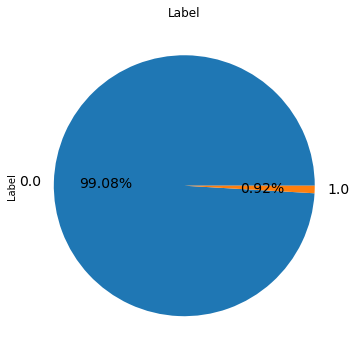

In [9]:
classes = dataset.Label.value_counts()
classes.plot.pie(figsize=(10,6), fontsize = 14, autopct='%1.2f%%', title = 'Label')

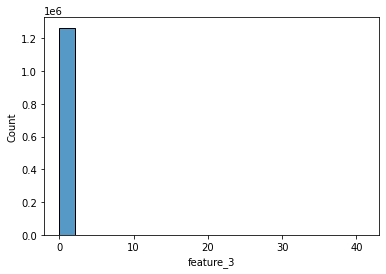

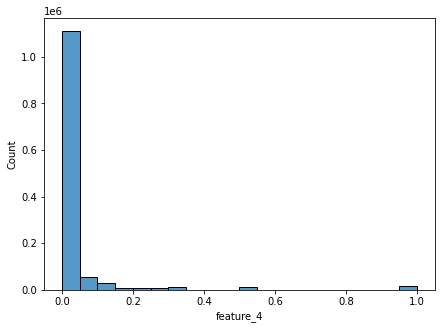

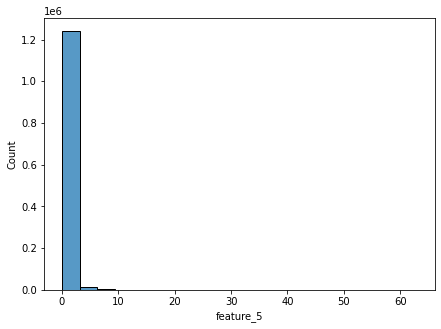

In [10]:
for i in X.columns[1:len(X.columns)]:
    sns.histplot(data = X[i], bins = 20)
    plt.rcParams['figure.figsize'] = (7, 5)
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [12]:
X = dataset[['id','src-id','status','cos_sim','feature_2','feature_3','feature_4','feature_5']]
y = dataset['Label']
X[X.id==1]

,id,src-id,status,cos_sim,feature_2,feature_3,feature_4,feature_5
0,1,5622,2,0.000000,0.012994,0.0,0.013514,0.015873
1,1,5928,2,0.000000,0.009648,0.0,0.010417,0.015873
2,1,5410,2,0.000000,0.000000,0.0,0.000000,0.000000
3,1,5409,2,0.000000,0.000000,0.0,0.000000,0.000000
4,1,2002,2,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
296,1,2594,2,0.001739,0.000000,0.0,0.000000,0.000000
297,1,6324,2,0.001742,0.000000,0.0,0.000000,0.000000
298,1,3515,2,0.001742,0.000000,0.0,0.000000,0.000000
299,1,3348,2,0.001752,0.000000,0.0,0.000000,0.000000


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(885563, 8)
(885563,)
(379528, 8)
(379528,)


In [14]:
y_train.value_counts()

0.0    877377
1.0      8186
Name: Label, dtype: int64

In [15]:
X_train_ft = X_train.drop(columns=['id','src-id'])
X_test_ft = X_test.drop(columns=['id','src-id'])

In [16]:
from sklearn import svm

In [17]:
SVM = svm.SVC(kernel='linear',class_weight='balanced')
SVM.fit(X_train_ft,y_train)
SVM

SVC(class_weight='balanced', kernel='linear')

In [18]:
y_predict = SVM.predict(X_test_ft)
print('Predicted labels')
print (y_predict [0:10])
print('True labels')
print(np.array(y_test[0:10]))

Predicted labels
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
True labels
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
from sklearn import metrics
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_predict))
print("Test F1 Score: ",metrics.f1_score(y_test,y_predict))
print("Precision Score: ",metrics.precision_score(y_test,y_predict))

pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.9845228810522544
Test F1 Score:  0.5256782945736433
Precision Score:  0.36659533731276045


Predicted,0.0,1.0,All
True,,,
0.0,370399,5624,376023
1.0,250,3255,3505
All,370649,8879,379528


In [20]:
X_test

,id,src-id,status,cos_sim,feature_2,feature_3,feature_4,feature_5
69795,233,5873,2,0.000000,0.0,0.0,0.076923,0.015873
1002874,3343,4623,0,0.002197,0.0,0.0,0.000000,0.000000
726102,2421,8717,0,0.000000,0.0,0.0,0.000000,0.000000
1178168,3928,8587,0,0.001517,0.0,0.0,0.000000,0.000000
315639,1053,6815,4,0.000042,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
640789,2136,7678,2,0.000600,0.0,0.0,0.000000,0.000000
926743,3090,9395,0,0.004028,0.0,0.0,0.000000,0.000000
721860,2407,5661,0,0.000000,0.0,0.0,0.000000,0.000000
702585,2342,3801,0,0.001224,0.0,0.0,0.000000,0.000000


In [21]:
X_test_ft

,status,cos_sim,feature_2,feature_3,feature_4,feature_5
69795,2,0.000000,0.0,0.0,0.076923,0.015873
1002874,0,0.002197,0.0,0.0,0.000000,0.000000
726102,0,0.000000,0.0,0.0,0.000000,0.000000
1178168,0,0.001517,0.0,0.0,0.000000,0.000000
315639,4,0.000042,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...
640789,2,0.000600,0.0,0.0,0.000000,0.000000
926743,0,0.004028,0.0,0.0,0.000000,0.000000
721860,0,0.000000,0.0,0.0,0.000000,0.000000
702585,0,0.001224,0.0,0.0,0.000000,0.000000


In [22]:
SVM.support_vectors_

array([[0.00000000e+00, 6.88793465e-03, 7.32545981e-03, 0.00000000e+00,
        3.44827586e-02, 1.58730159e-02],
       [0.00000000e+00, 7.36360683e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [4.00000000e+00, 1.12003410e-03, 4.21902702e-02, 0.00000000e+00,
        1.42857143e-01, 4.76190476e-02],
       ...,
       [2.00000000e+00, 1.83529474e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 6.71997265e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 9.75240739e-03, 1.92947008e-02, 0.00000000e+00,
        1.00000000e+00, 3.17460317e-02]])

In [23]:
SVM.support_

array([     5,      6,     18, ..., 884857, 884873, 885106])

In [24]:
np.array(X_test_ft)[0]

array([2.        , 0.        , 0.        , 0.        , 0.07692308,
       0.01587302])

In [25]:
Ranking_Score = np.array(X_test_ft).dot(SVM.coef_[0])
Ranking_Score

array([0.30801416, 0.27505372, 0.        , ..., 0.        , 0.1532261 ,
       0.30790883])

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

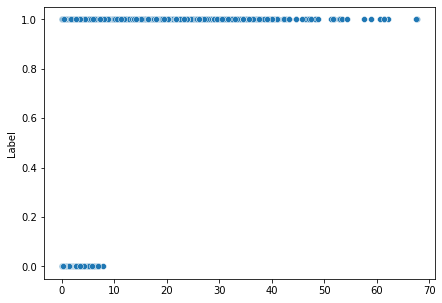

In [27]:
sns.scatterplot(x = Ranking_Score, y=y_test)
plt.show()

In [45]:
dataset_test = X_test
dataset_test['Label'] = y_test
dataset_test[dataset_test.Label == 1]

,id,src-id,status,cos_sim,feature_2,feature_3,feature_4,feature_5,Label
1256138,228,3192,4,0.142694,0.181161,0.000000,1.000000,0.095238,1.0
1264049,2853,2991,0,0.106881,0.000000,0.000000,0.000000,0.000000,1.0
1253893,1122,4336,0,0.156090,0.101210,0.000000,0.142857,0.555556,1.0
1264386,3123,8673,0,0.226379,0.000000,0.000000,0.000000,0.000000,1.0
1255084,170,2640,4,0.093855,0.174436,0.000000,0.142857,0.095238,1.0
...,...,...,...,...,...,...,...,...,...
1260039,4125,2572,0,0.083936,0.014226,0.000000,0.500000,0.015873,1.0
1264625,3481,9161,0,0.031606,0.165401,0.000000,1.000000,0.031746,1.0
1259902,981,2450,2,0.111999,0.000000,0.000000,0.000000,0.000000,1.0
1260464,2884,5975,2,0.309832,0.000000,0.292683,0.000000,0.000000,1.0


### RSVM model

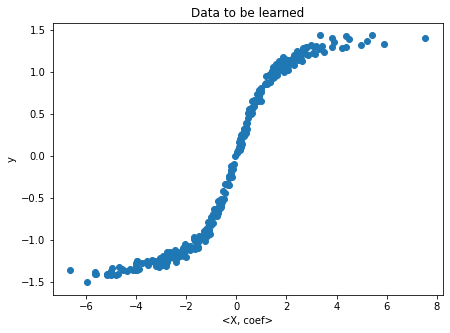

Performance of ranking  0.9787878787878788
Performance of linear regression  0.9587570621468926
(300, 5)
(300, 2)


In [28]:
import itertools
import numpy as np

from sklearn import svm, linear_model
from sklearn.model_selection import KFold


def transform_pairwise(X, y):
    """Transforms data into pairs with balanced labels for ranking
    Transforms a n-class ranking problem into a two-class classification
    problem. Subclasses implementing particular strategies for choosing
    pairs should override this method.
    In this method, all pairs are choosen, except for those that have the
    same target value. The output is an array of balanced classes, i.e.
    there are the same number of -1 as +1
    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,) or (n_samples, 2)
        Target labels. If it's a 2D array, the second column represents
        the grouping of samples, i.e., samples with different groups will
        not be considered.
    Returns
    -------
    X_trans : array, shape (k, n_feaures)
        Data as pairs
    y_trans : array, shape (k,)
        Output class labels, where classes have values {-1, +1}
    """
    X_new = []
    y_new = []
    y = np.asarray(y)
    if y.ndim == 1:
        y = np.c_[y, np.ones(y.shape[0])]
    comb = itertools.combinations(range(X.shape[0]), 2)
    for k, (i, j) in enumerate(comb):
        if y[i, 0] == y[j, 0] or y[i, 1] != y[j, 1]:
            # skip if same target or different group
            continue
        X_new.append(X[i] - X[j])
        y_new.append(np.sign(y[i, 0] - y[j, 0]))
        # output balanced classes
        if y_new[-1] != (-1) ** k:
            y_new[-1] = - y_new[-1]
            X_new[-1] = - X_new[-1]
    return np.asarray(X_new), np.asarray(y_new).ravel()


class RankSVM(svm.LinearSVC):
    """Performs pairwise ranking with an underlying LinearSVC model
    Input should be a n-class ranking problem, this object will convert it
    into a two-class classification problem, a setting known as
    `pairwise ranking`.
    See object :ref:`svm.LinearSVC` for a full description of parameters.
    """

    def fit(self, X, y):
        """
        Fit a pairwise ranking model.
        Parameters
        ----------
        X : array, shape (n_samples, n_features)
        y : array, shape (n_samples,) or (n_samples, 2)
        Returns
        -------
        self
        """
        X_trans, y_trans = transform_pairwise(X, y)
        super(RankSVM, self).fit(X_trans, y_trans)
        return self

    def predict(self, X):
        """
        Predict an ordering on X. For a list of n samples, this method
        returns a list from 0 to n-1 with the relative order of the rows of X.
        Parameters
        ----------
        X : array, shape (n_samples, n_features)
        Returns
        -------
        ord : array, shape (n_samples,)
            Returns a list of integers representing the relative order of
            the rows in X.
        """
        if hasattr(self, 'coef_'):
            np.argsort(np.dot(X, self.coef_.T))
        else:
            raise ValueError("Must call fit() prior to predict()")

    def score(self, X, y):
        """
        Because we transformed into a pairwise problem, chance level is at 0.5
        """
        X_trans, y_trans = transform_pairwise(X, y)
        return np.mean(super(RankSVM, self).predict(X_trans) == y_trans)


if __name__ == '__main__':
    # as showcase, we will create some non-linear data
    # and print the performance of ranking vs linear regression

    np.random.seed(1)
    n_samples, n_features = 300, 5
    true_coef = np.random.randn(n_features)
    X = np.random.randn(n_samples, n_features)
    noise = np.random.randn(n_samples) / np.linalg.norm(true_coef)
    y = np.dot(X, true_coef)
    y = np.arctan(y)  # add non-linearities
    y += .1 * noise  # add noise
    Y = np.c_[y, np.mod(np.arange(n_samples), 5)]  # add query fake id
    cv = KFold(n_splits=5)
    train, test = cv.split(X, y).__next__()

    # make a simple plot out of it
    import pylab as pl

    pl.scatter(np.dot(X, true_coef), y)
    pl.title('Data to be learned')
    pl.xlabel('<X, coef>')
    pl.ylabel('y')
    pl.show()

    # print the performance of ranking
    rank_svm = RankSVM().fit(X[train], Y[train])
    print('Performance of ranking ', rank_svm.score(X[test], Y[test]))

    # and that of linear regression
    ridge = linear_model.RidgeCV(fit_intercept=True)
    ridge.fit(X[train], y[train])
    X_test_trans, y_test_trans = transform_pairwise(X[test], y[test])
    score = np.mean(np.sign(np.dot(X_test_trans, ridge.coef_)) == y_test_trans)
    print('Performance of linear regression ', score)
    print(X.shape)
    print(Y.shape)

In [29]:
X

array([[-2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944],
       [-1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521],
       ...,
       [-1.61964569,  2.00514053, -0.18762635, -0.14894123,  1.16533544],
       [ 0.19664529, -0.63259014, -0.20984695,  1.89716069, -1.38139115],
       [ 1.30122484, -0.31239212, -0.27122872,  1.86291309, -0.64287359]])

In [30]:
y

array([-1.33527908e+00,  1.36483242e+00, -7.11692340e-01, -1.22622867e+00,
        2.53715155e-01, -1.97711515e-01, -5.16017688e-01, -8.45029432e-01,
       -1.07444920e+00,  9.64647012e-01,  3.92674379e-01, -1.07815622e+00,
       -1.39945646e+00, -1.30564856e+00, -1.24899473e+00, -5.28685029e-01,
        8.61480442e-01,  1.29242842e+00,  1.02455106e+00, -1.26138472e+00,
        5.53226677e-01, -1.00371175e+00, -1.08083163e+00, -1.35225264e+00,
        1.19941288e+00,  7.39387740e-01, -1.09868409e+00, -9.23074757e-01,
        1.08776614e-01, -9.83169127e-01, -7.81710867e-01,  3.89677958e-01,
       -1.36974410e+00, -1.14037354e+00, -1.04525389e+00, -1.27541181e+00,
       -1.12339060e+00,  4.69283250e-02, -1.30594733e+00, -1.35401385e+00,
        9.42106859e-01, -6.35697286e-01, -1.02906068e-01,  3.15559232e-01,
        1.32075802e+00, -1.19438409e+00,  9.73727074e-01,  1.00173710e-01,
       -1.09580668e+00, -6.28629093e-01, -1.34783301e+00,  8.70702102e-01,
        6.64528041e-01, -